<h1> CSE351 HW2 </h1>

# <h1> Data </h1>
The goal of this homework is to develop a method to predict the electricity usage based on the weather conditions. We provide the following two datasets for this task:

1. Weather: Weather data for one year with daily weather conditions
2. Energy Usage: Energy usage history for one year (in kW) with 30-minute intervals. The energy usage of specific devices like AC, Fridge, washer, etc. are also given.

You will need to submit your code (programs/source files) in three different formats (.ipynb, .pdf and .py). Make sure that you properly document your program (code) with proper comments highlighting the exact sequence of operations which are required to arrive at the resulting tables and figures. The submission instructions are provided at the end of the assignment.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving weather_data.csv to weather_data.csv
Saving energy_data.csv to energy_data.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from wordcloud import WordCloud
import csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import f1_score
import datetime

<h1> 1. </h1>
1. Examine the data, parse the time fields wherever necessary. Take the sum of the energy usage (Use [kW]) to get per day usage and merge it with weather data (10 Points).

In [ ]:
energydf = pd.read_csv('energy_data.csv')
energydf.describe()

,use [kW],gen [kW],Grid [kW],AC [kW],Furnace [kW],Cellar Lights [kW],Washer [kW],First Floor lights [kW],Utility Rm + Basement Bath [kW],Garage outlets [kW],MBed + KBed outlets [kW],Dryer + egauge [kW],Panel GFI (central vac) [kW],Home Office (R) [kW],Dining room (R) [kW],Microwave (R) [kW],Fridge (R) [kW]
count,17520.000000,17520.0,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,1.752000e+04,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000
mean,0.662905,0.0,0.662905,0.088999,0.085888,0.011036,0.003067,0.015852,0.005105,0.005949,4.602680e-02,0.069099,0.005005,0.053700,0.004186,0.015237,0.073561
std,0.678399,0.0,0.678399,0.438887,0.129054,0.013123,0.020444,0.030792,0.020500,0.003621,7.525857e-02,0.430429,0.007543,0.037668,0.005455,0.066807,0.062182
min,0.011083,0.0,0.011083,0.000000,0.000117,0.000083,0.000000,0.000350,0.000017,0.000050,5.560000e-07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.314125,0.0,0.314125,0.000030,0.009340,0.005414,0.000099,0.003630,0.002388,0.004841,2.116667e-03,0.000030,0.000298,0.003468,0.001346,0.004153,0.006558
50%,0.468725,0.0,0.468725,0.000069,0.009704,0.005881,0.000219,0.003718,0.003737,0.004928,3.109528e-02,0.000058,0.006979,0.072627,0.003882,0.004624,0.070129
75%,0.700617,0.0,0.700617,0.000707,0.143531,0.007042,0.000333,0.015980,0.003876,0.005001,6.671972e-02,0.000096,0.007175,0.077099,0.004446,0.004877,0.129642
max,6.833205,0.0,6.833205,3.687768,0.437212,0.146692,0.819167,0.423816,0.476571,0.047370,1.514727e+00,4.287879,0.366653,0.211308,0.074872,1.701807,0.410929


In [ ]:
energydf.head()

,Date & Time,use [kW],gen [kW],Grid [kW],AC [kW],Furnace [kW],Cellar Lights [kW],Washer [kW],First Floor lights [kW],Utility Rm + Basement Bath [kW],Garage outlets [kW],MBed + KBed outlets [kW],Dryer + egauge [kW],Panel GFI (central vac) [kW],Home Office (R) [kW],Dining room (R) [kW],Microwave (R) [kW],Fridge (R) [kW]
0,2014-01-01 00:00:00,0.304439,0.0,0.304439,0.000058,0.009531,0.005336,0.000126,0.011175,0.003836,0.004836,0.002132,0.000009,0.007159,0.063666,0.004299,0.004733,0.042589
1,2014-01-01 00:30:00,0.656771,0.0,0.656771,0.001534,0.364338,0.005522,0.000043,0.003514,0.003512,0.004888,0.002137,0.000107,0.007221,0.064698,0.003589,0.004445,0.096008
2,2014-01-01 01:00:00,0.612895,0.0,0.612895,0.001847,0.417989,0.005504,0.000044,0.003528,0.003484,0.004929,0.002052,0.000170,0.007197,0.065109,0.003522,0.004396,0.025928
3,2014-01-01 01:30:00,0.683979,0.0,0.683979,0.001744,0.410653,0.005556,0.000059,0.003499,0.003476,0.004911,0.002068,0.000121,0.007236,0.065032,0.003404,0.004262,0.105472
4,2014-01-01 02:00:00,0.197809,0.0,0.197809,0.000030,0.017152,0.005302,0.000119,0.003694,0.003865,0.004876,0.002087,0.000052,0.007133,0.062451,0.003915,0.004407,0.016798


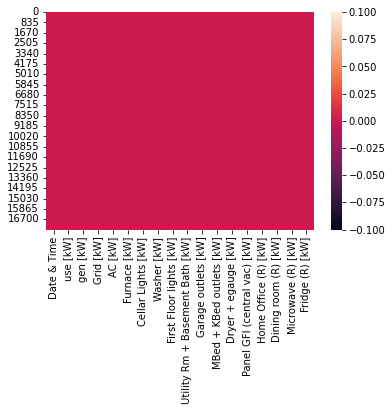

In [ ]:
#Clean data, find outliers, and analyze.
sns.heatmap(energydf.isnull())

In [ ]:
#The fact that the 'gen [kW]' column has a mean of 0.0 and all the other statistics are 0 indicates that no households included generated their own electricity.
#In additon, 'use [kW]' and 'Grid [kW]' would logically have to be the same since nobody generated their own electricity.
#We can confirm that these columns are identical using a function in pandas.
energydf['use [kW]'].equals(energydf['Grid [kW]'])

True

In [ ]:
#energydf = energydf.groupby(energydf.index.date)['y'].sum().reset_index() from https://python.tutorialink.com/pandas-dataframe-sum-up-rows-by-date-and-keep-only-one-row-per-day-without-timestamp/ doesn't seem to work.
#energydf.groupby([energydf.dt.year, energydf.dt.month, energydf.dt.day])['y'].sum() This does not seem to work :(
#We will remove everything but the use since that is the only column that concerns us
energydf = energydf.filter(['Date & Time', 'use [kW]'])
energydf.head()

,Date & Time,use [kW]
0,2014-01-01 00:00:00,0.304439
1,2014-01-01 00:30:00,0.656771
2,2014-01-01 01:00:00,0.612895
3,2014-01-01 01:30:00,0.683979
4,2014-01-01 02:00:00,0.197809


In [ ]:
#energydf.groupby([energydf.dt.year, energydf.dt.month, energydf.dt.day])['y'].sum() Still errors
#energydf.groupby(pd.to_datetime(df.time).dt.date).agg({'Date & Time': 'sum', 'x':'first', 'y':'first'}).reset_index()
#energydf.dtypes

#Wait let me try something cool that someone told me to do
#energydf['Date & Time'] = pd.to_datetime(energydf['Date & Time'])#.dt.date

#energydf
#energydf.groupby(pd.to_datetime(energydf.time).dt.date).agg({'use [kW]': 'sum'}).reset_index()
#energydf.groupby('Date & Time').sum()

In [ ]:
#energydf.head()

In [ ]:
#Rename the column name to 'time' so we can perform a merge later
#energydf.rename(columns={'Date & Time': "time", "use [kW]": "use [kW]"}) Does not seem to work
#energydf.columns = ['time', 'use [kW]']
energydf = energydf.rename(columns={'Date & Time': "time", "use [kW]": "use [kW]"})

In [ ]:
energydf

,time,use [kW]
0,2014-01-01 00:00:00,0.304439
1,2014-01-01 00:30:00,0.656771
2,2014-01-01 01:00:00,0.612895
3,2014-01-01 01:30:00,0.683979
4,2014-01-01 02:00:00,0.197809
...,...,...
17515,2014-12-31 21:30:00,1.560890
17516,2014-12-31 22:00:00,0.958447
17517,2014-12-31 22:30:00,0.834462
17518,2014-12-31 23:00:00,0.543863


In [ ]:
#energydf.dtypes
#energydf = energydf.groupby('Date & Time').sum()
#energydf.head()
#energydf = energydf.groupby('time').sum()
#energydf = energydf.groupby(energydf['time'].dt.date).sum()
energydf['time'] = pd.to_datetime(energydf['time'])
#energydf.info()
energydf = energydf.groupby(pd.Grouper(key="time", freq="1D")).sum()

In [ ]:
energydf
#energydf

,use [kW]
time,
2014-01-01,65.013592
2014-01-02,32.305336
2014-01-03,31.164468
2014-01-04,45.287782
2014-01-05,36.316643
...,...
2014-12-27,35.046127
2014-12-28,37.695824
2014-12-29,28.675929


In [ ]:
weatherdf = pd.read_csv('weather_data.csv')
weatherdf.describe()

,temperature,humidity,visibility,pressure,windSpeed,cloudCover,time,windBearing,precipIntensity,dewPoint,precipProbability
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,7290.000000,8.760000e+03,8760.00000,8760.000000,8760.000000,8760.000000
mean,48.062076,0.682888,9.025791,1016.450749,6.534568,0.137971,1.404301e+09,204.46347,0.003761,37.072056,0.066771
std,19.694743,0.188763,1.859263,7.903670,3.884500,0.212384,9.104179e+06,106.57823,0.015565,20.257221,0.183459
min,-10.070000,0.140000,0.320000,979.980000,0.030000,0.000000,1.388534e+09,0.00000,0.000000,-15.870000,0.000000
25%,33.165000,0.530000,9.040000,1011.530000,3.630000,0.000000,1.396418e+09,150.00000,0.000000,23.425000,0.000000
50%,49.220000,0.710000,9.970000,1016.430000,5.850000,0.060000,1.404301e+09,210.00000,0.000000,38.510000,0.000000
75%,63.832500,0.860000,10.000000,1021.310000,8.692500,0.200000,1.412184e+09,297.00000,0.000000,54.302500,0.000000
max,89.460000,0.960000,10.000000,1042.400000,24.750000,1.000000,1.420067e+09,359.00000,0.355700,72.880000,0.870000


In [ ]:
weatherdf.head()

,temperature,icon,humidity,visibility,summary,pressure,windSpeed,cloudCover,time,windBearing,precipIntensity,dewPoint,precipProbability
0,34.98,partly-cloudy-night,0.64,10.00,Partly Cloudy,1017.69,7.75,0.29,1388534400,279,0.0,23.89,0.0
1,16.49,clear-night,0.62,10.00,Clear,1022.76,2.71,0.06,1388538000,195,0.0,5.87,0.0
2,14.63,clear-night,0.68,10.00,Clear,1022.32,4.84,0.03,1388541600,222,0.0,6.17,0.0
3,13.31,clear-night,0.71,10.00,Clear,1021.64,4.00,0.14,1388545200,209,0.0,5.63,0.0
4,13.57,clear-night,0.71,9.93,Clear,1020.73,3.67,0.04,1388548800,217,0.0,5.87,0.0


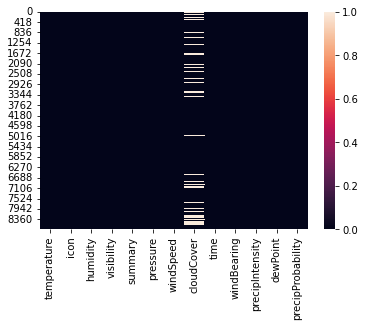

In [ ]:
  sns.heatmap(weatherdf.isnull())

In [ ]:
#pd.to_datetime(energydf['Date & Time'], unit='s') Instead of converting from 'Date & Time' in energydf to UNIX time I will just convert 'time' from weatherdf to date and time since it does not give error.
weatherdf['time'] = pd.to_datetime(weatherdf['time'], unit='s')

In [ ]:
weatherdf.head()

,temperature,icon,humidity,visibility,summary,pressure,windSpeed,cloudCover,time,windBearing,precipIntensity,dewPoint,precipProbability
0,34.98,partly-cloudy-night,0.64,10.00,Partly Cloudy,1017.69,7.75,0.29,2014-01-01 00:00:00,279,0.0,23.89,0.0
1,16.49,clear-night,0.62,10.00,Clear,1022.76,2.71,0.06,2014-01-01 01:00:00,195,0.0,5.87,0.0
2,14.63,clear-night,0.68,10.00,Clear,1022.32,4.84,0.03,2014-01-01 02:00:00,222,0.0,6.17,0.0
3,13.31,clear-night,0.71,10.00,Clear,1021.64,4.00,0.14,2014-01-01 03:00:00,209,0.0,5.63,0.0
4,13.57,clear-night,0.71,9.93,Clear,1020.73,3.67,0.04,2014-01-01 04:00:00,217,0.0,5.87,0.0


In [ ]:
weatherdf['time'] = pd.to_datetime(weatherdf['time'])#.dt.date
weatherdf = weatherdf.groupby(pd.Grouper(key="time", freq="1D")).mean()

In [ ]:
#weatherdf = weatherdf.groupby('time',as_index=False).mean()

In [ ]:
weatherdf

,temperature,humidity,visibility,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
time,,,,,,,,,,
2014-01-01,20.110833,0.556667,9.970000,1025.395000,6.820417,0.031304,252.291667,0.000000,6.362083,0.000000
2014-01-02,16.382500,0.784583,3.834583,1023.465833,7.433750,0.354444,53.458333,0.002004,10.737083,0.074583
2014-01-03,6.256667,0.680833,4.509167,1014.428750,12.828333,0.186364,207.333333,0.002029,-2.337500,0.080000
2014-01-04,2.711667,0.617083,9.822917,1030.096250,5.248333,0.001667,240.166667,0.000000,-8.352083,0.000000
2014-01-05,17.654167,0.682083,9.134583,1025.275000,3.417083,0.010952,208.958333,0.000033,8.615000,0.000417
...,...,...,...,...,...,...,...,...,...,...
2014-12-27,35.487083,0.756250,9.246250,1022.081667,3.677083,0.030417,243.791667,0.000000,27.992500,0.000000
2014-12-28,41.892917,0.763750,9.332917,1013.549167,6.587917,0.245909,224.458333,0.003996,34.876250,0.137917
2014-12-29,34.728333,0.592083,9.997083,1018.870833,8.129583,0.119167,281.833333,0.000000,21.570000,0.000000


In [ ]:
result = pd.merge(energydf, weatherdf, on="time")

In [ ]:
result

,use [kW],temperature,humidity,visibility,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
time,,,,,,,,,,,
2014-01-01,65.013592,20.110833,0.556667,9.970000,1025.395000,6.820417,0.031304,252.291667,0.000000,6.362083,0.000000
2014-01-02,32.305336,16.382500,0.784583,3.834583,1023.465833,7.433750,0.354444,53.458333,0.002004,10.737083,0.074583
2014-01-03,31.164468,6.256667,0.680833,4.509167,1014.428750,12.828333,0.186364,207.333333,0.002029,-2.337500,0.080000
2014-01-04,45.287782,2.711667,0.617083,9.822917,1030.096250,5.248333,0.001667,240.166667,0.000000,-8.352083,0.000000
2014-01-05,36.316643,17.654167,0.682083,9.134583,1025.275000,3.417083,0.010952,208.958333,0.000033,8.615000,0.000417
...,...,...,...,...,...,...,...,...,...,...,...
2014-12-27,35.046127,35.487083,0.756250,9.246250,1022.081667,3.677083,0.030417,243.791667,0.000000,27.992500,0.000000
2014-12-28,37.695824,41.892917,0.763750,9.332917,1013.549167,6.587917,0.245909,224.458333,0.003996,34.876250,0.137917
2014-12-29,28.675929,34.728333,0.592083,9.997083,1018.870833,8.129583,0.119167,281.833333,0.000000,21.570000,0.000000


In [ ]:
result = result.reset_index()

In [ ]:
result

,time,use [kW],temperature,humidity,visibility,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
0,2014-01-01,65.013592,20.110833,0.556667,9.970000,1025.395000,6.820417,0.031304,252.291667,0.000000,6.362083,0.000000
1,2014-01-02,32.305336,16.382500,0.784583,3.834583,1023.465833,7.433750,0.354444,53.458333,0.002004,10.737083,0.074583
2,2014-01-03,31.164468,6.256667,0.680833,4.509167,1014.428750,12.828333,0.186364,207.333333,0.002029,-2.337500,0.080000
3,2014-01-04,45.287782,2.711667,0.617083,9.822917,1030.096250,5.248333,0.001667,240.166667,0.000000,-8.352083,0.000000
4,2014-01-05,36.316643,17.654167,0.682083,9.134583,1025.275000,3.417083,0.010952,208.958333,0.000033,8.615000,0.000417
...,...,...,...,...,...,...,...,...,...,...,...,...
360,2014-12-27,35.046127,35.487083,0.756250,9.246250,1022.081667,3.677083,0.030417,243.791667,0.000000,27.992500,0.000000
361,2014-12-28,37.695824,41.892917,0.763750,9.332917,1013.549167,6.587917,0.245909,224.458333,0.003996,34.876250,0.137917
362,2014-12-29,28.675929,34.728333,0.592083,9.997083,1018.870833,8.129583,0.119167,281.833333,0.000000,21.570000,0.000000
363,2014-12-30,31.514313,24.846667,0.488750,9.998333,1026.102083,7.566667,0.031250,312.041667,0.000000,7.772083,0.000000


<h1> 2. </h1>
2. Split the data obtained from step 1, into training and testing sets. The aim is to predict the usage for each day in the month of December using the weather data, so split accordingly. The usage as per devices should be dropped, only the “use [kW]” column is to be used for prediction from the dataset (5 points).

In [ ]:
#test = energydf.loc[energydf['time'].dt.month == 12]
#train = energydf.loc[energydf['time'].dt.month != 12]
#result.reset_index() need to reset index before and set result equal to that result
train = result.loc[result['time'].dt.month != 12]
test = result.loc[result['time'].dt.month == 12]

In [ ]:
train

,time,use [kW],temperature,humidity,visibility,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
0,2014-01-01,65.013592,20.110833,0.556667,9.970000,1025.395000,6.820417,0.031304,252.291667,0.000000,6.362083,0.000000
1,2014-01-02,32.305336,16.382500,0.784583,3.834583,1023.465833,7.433750,0.354444,53.458333,0.002004,10.737083,0.074583
2,2014-01-03,31.164468,6.256667,0.680833,4.509167,1014.428750,12.828333,0.186364,207.333333,0.002029,-2.337500,0.080000
3,2014-01-04,45.287782,2.711667,0.617083,9.822917,1030.096250,5.248333,0.001667,240.166667,0.000000,-8.352083,0.000000
4,2014-01-05,36.316643,17.654167,0.682083,9.134583,1025.275000,3.417083,0.010952,208.958333,0.000033,8.615000,0.000417
...,...,...,...,...,...,...,...,...,...,...,...,...
329,2014-11-26,27.712850,36.385000,0.778333,6.551667,1019.266250,6.445833,0.171333,185.375000,0.024837,29.875417,0.291250
330,2014-11-27,30.114004,31.992500,0.847083,7.394583,1012.272917,7.599167,0.420769,316.833333,0.006033,27.862083,0.160417
331,2014-11-28,26.348404,29.126250,0.763750,8.919167,1018.359583,6.599167,0.268947,316.416667,0.000271,22.335000,0.006667
332,2014-11-29,20.241298,22.344583,0.706667,9.793750,1025.543750,4.299167,0.049167,230.375000,0.000000,13.982083,0.000000


In [ ]:
test

,time,use [kW],temperature,humidity,visibility,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
334,2014-12-01,30.550010,45.276250,0.722083,9.656667,1018.805417,6.397083,0.263333,226.958333,0.000000,36.748750,0.000000
335,2014-12-02,31.748857,34.177917,0.582917,9.839583,1034.805833,7.527083,0.121818,166.625000,0.000000,21.006250,0.000000
336,2014-12-03,28.773233,36.345833,0.911250,4.939167,1022.247500,5.691250,0.862000,119.333333,0.010754,33.994167,0.240833
337,2014-12-04,39.484491,36.216250,0.584167,9.976667,1024.064583,9.129583,0.130000,286.125000,0.000371,22.777500,0.010000
338,2014-12-05,33.342503,27.463750,0.698750,9.847083,1035.654167,3.421667,0.069130,63.833333,0.000000,18.462083,0.000000
339,2014-12-06,36.470153,34.868750,0.909167,4.692500,1026.207500,3.397083,0.862000,117.791667,0.022008,32.409167,0.476667
340,2014-12-07,26.486585,33.502917,0.641667,9.490417,1029.725000,12.755417,0.170952,50.000000,0.009396,21.621250,0.168333
341,2014-12-08,23.013980,19.519583,0.562917,9.980833,1039.599583,8.700000,0.062105,15.458333,0.000000,6.322917,0.000000
342,2014-12-09,27.954351,30.960417,0.857500,6.005417,1023.523333,10.067500,1.000000,20.000000,0.037779,27.157500,0.342083
343,2014-12-10,37.422625,36.709583,0.911250,3.816250,1001.643750,9.912083,1.000000,293.500000,0.009875,34.404583,0.295833


<h1> 3. </h1>
3. Linear Regression - Predicting Energy Usage:

Set up a simple linear regression model to train, and then predict energy usage for each day in the month of December using features from weather data (Note that you need to drop the “use [kW]” column in the test set first). How well/badly does the model work? (Evaluate the correctness of your predictions based on the original “use [kW]” column). Calculate the Root mean squared error
of your model.

Finally generate a csv dump of the predicted values. Format of csv: Two columns, first should be the date and second should be the predicted value. (20 points)

In [ ]:
linReg = LinearRegression()
#linReg.fit(train.columns != 'use [kW]', train.columns == 'use [kW]')
linReg.fit(train.drop(['use [kW]', 'time'], axis = 1), train['use [kW]'])

#linReg.predict(train.loc[:, train.columns != 'use [kW]'])
linPredictedUsage = linReg.predict(test.drop(['use [kW]', 'time'], axis = 1))

linPredictedUsage

array([30.43457312, 31.6556055 , 18.30638052, 31.43589939, 23.81815813,
       21.34638909, 22.95965138, 24.90248154, 20.0580725 , 18.53616071,
       19.5070998 , 21.95908842, 25.62554619, 24.56240186, 27.90688889,
       17.04274926, 23.64611421, 26.08520137, 25.60049498, 25.38361334,
       15.0220098 , 13.78488489, 14.2039299 , 16.89665035, 30.40174451,
       34.00289194, 26.72679948, 27.75019123, 30.47762069, 29.75450607,
       25.71173412])

In [ ]:
mean_squared_error(test['use [kW]'], linPredictedUsage, squared=False)

8.740566311137929

In [ ]:
linArraytoConvert = {'date':test['time'], 'predicted value':linPredictedUsage}

In [ ]:
linPredictedDataframe = pd.DataFrame(linArraytoConvert)

In [ ]:
linPredictedDataframe.head()

,date,predicted value
334,2014-12-01,30.434573
335,2014-12-02,31.655605
336,2014-12-03,18.306381
337,2014-12-04,31.435899
338,2014-12-05,23.818158


In [ ]:
linPredictedDataframe.to_csv('cse351_hw2_xia_sean_113181409_linear_regression.csv', index=False)

<h1> 4. </h1>
4. Logistic Regression - Temperature classification:

Using only weather data we want to classify if the temperature is high or low. Let's assume temperature greater than or equal to 35 is ‘high’ and below 35 is ‘low’. Set up a logistic regression model to classify the temperature for each day in the month of December. Calculate the F1 score for the model.

Finally generate a csv dump of the classification (1 for high, 0 for low)

Format: Two columns, first should be the date and second should be the classification (1/0).

(20 points)

In [ ]:
logTrain = train.copy()
#logTrain['temperature'] = pd.where(train['education'] < 35, 0, data['education'])
#logTrain.loc[logTrain["temperature"] < 35.0, "temperature"] = 0
logTrain['temperature'] = [1 if x >= 35 else 0 for x in logTrain['temperature']]

logTrain

,time,use [kW],temperature,humidity,visibility,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
0,2014-01-01,65.013592,0,0.556667,9.970000,1025.395000,6.820417,0.031304,252.291667,0.000000,6.362083,0.000000
1,2014-01-02,32.305336,0,0.784583,3.834583,1023.465833,7.433750,0.354444,53.458333,0.002004,10.737083,0.074583
2,2014-01-03,31.164468,0,0.680833,4.509167,1014.428750,12.828333,0.186364,207.333333,0.002029,-2.337500,0.080000
3,2014-01-04,45.287782,0,0.617083,9.822917,1030.096250,5.248333,0.001667,240.166667,0.000000,-8.352083,0.000000
4,2014-01-05,36.316643,0,0.682083,9.134583,1025.275000,3.417083,0.010952,208.958333,0.000033,8.615000,0.000417
...,...,...,...,...,...,...,...,...,...,...,...,...
329,2014-11-26,27.712850,1,0.778333,6.551667,1019.266250,6.445833,0.171333,185.375000,0.024837,29.875417,0.291250
330,2014-11-27,30.114004,0,0.847083,7.394583,1012.272917,7.599167,0.420769,316.833333,0.006033,27.862083,0.160417
331,2014-11-28,26.348404,0,0.763750,8.919167,1018.359583,6.599167,0.268947,316.416667,0.000271,22.335000,0.006667
332,2014-11-29,20.241298,0,0.706667,9.793750,1025.543750,4.299167,0.049167,230.375000,0.000000,13.982083,0.000000


In [ ]:
logTest = test.copy()
#logTrain['temperature'] = pd.where(train['education'] < 35, 0, data['education'])
#logTrain.loc[logTrain["temperature"] < 35.0, "temperature"] = 0
logTest['temperature'] = [1 if x >= 35 else 0 for x in logTest['temperature']]

logTest

,time,use [kW],temperature,humidity,visibility,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
334,2014-12-01,30.550010,1,0.722083,9.656667,1018.805417,6.397083,0.263333,226.958333,0.000000,36.748750,0.000000
335,2014-12-02,31.748857,0,0.582917,9.839583,1034.805833,7.527083,0.121818,166.625000,0.000000,21.006250,0.000000
336,2014-12-03,28.773233,1,0.911250,4.939167,1022.247500,5.691250,0.862000,119.333333,0.010754,33.994167,0.240833
337,2014-12-04,39.484491,1,0.584167,9.976667,1024.064583,9.129583,0.130000,286.125000,0.000371,22.777500,0.010000
338,2014-12-05,33.342503,0,0.698750,9.847083,1035.654167,3.421667,0.069130,63.833333,0.000000,18.462083,0.000000
339,2014-12-06,36.470153,0,0.909167,4.692500,1026.207500,3.397083,0.862000,117.791667,0.022008,32.409167,0.476667
340,2014-12-07,26.486585,0,0.641667,9.490417,1029.725000,12.755417,0.170952,50.000000,0.009396,21.621250,0.168333
341,2014-12-08,23.013980,0,0.562917,9.980833,1039.599583,8.700000,0.062105,15.458333,0.000000,6.322917,0.000000
342,2014-12-09,27.954351,0,0.857500,6.005417,1023.523333,10.067500,1.000000,20.000000,0.037779,27.157500,0.342083
343,2014-12-10,37.422625,1,0.911250,3.816250,1001.643750,9.912083,1.000000,293.500000,0.009875,34.404583,0.295833


In [ ]:
logTrain['temperature'].value_counts()

1    254
0     80
Name: temperature, dtype: int64

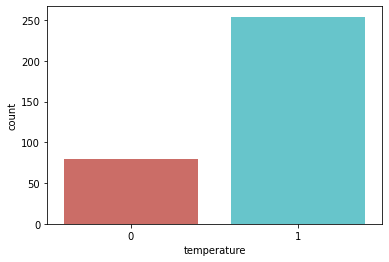

In [ ]:
sns.countplot(x='temperature', data = logTrain, palette='hls')
#plt.show()
#plt.showfig('count_plot')

In [ ]:
count_low = len(logTrain[logTrain['temperature'] == 0])
count_high = len(logTrain[logTrain['temperature'] == 1])
pct_low = count_low / (count_low + count_high)
print("Percentage of low temperature", pct_low * 100)
pct_high = count_high/(count_low+count_high)
print("percentage of high temperature", pct_high * 100)
#This is a little imbalanced but I cannot justify balancing since I am not good at data science.

Percentage of low temperature 23.952095808383234
percentage of high temperature 76.04790419161677


In [ ]:
logTrain.groupby('temperature').mean()

,use [kW],humidity,visibility,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
temperature,,,,,,,,,,
0,28.415107,0.595375,9.003047,1018.143964,7.493839,0.099638,233.633333,0.001198,9.315141,0.028917
1,33.120798,0.703447,9.100297,1015.523937,6.186202,0.200026,196.746555,0.004505,47.145056,0.076240


In [ ]:
logReg = LogisticRegression(max_iter = 200)

#linReg.fit(train.columns != 'use [kW]', train.columns == 'use [kW]')
logReg.fit(logTrain.drop(['temperature', 'time'], axis = 1), logTrain['temperature'])

#linReg.predict(train.loc[:, train.columns != 'use [kW]'])
logPredictedUsage = logReg.predict(logTest.drop(['temperature', 'time'], axis = 1))

logPredictedUsage

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0])

In [ ]:
f1_score(logTest['temperature'], logPredictedUsage)

0.6666666666666667

In [ ]:
logArraytoConvert = {'date':logTest['time'], 'predicted value':logPredictedUsage}

In [ ]:
logPredictedDataframe = pd.DataFrame(logArraytoConvert)

In [ ]:
logPredictedDataframe.head()

,date,predicted value
334,2014-12-01,1
335,2014-12-02,1
336,2014-12-03,1
337,2014-12-04,1
338,2014-12-05,0


In [ ]:
logPredictedDataframe.to_csv('cse351_hw2_xia_sean_113181409_logistic_regression.csv', index=False)

<h1> 5. </h1>
5. Energy usage data Analysis:
We want to analyze how different devices are being used in different times of the day.

- Is the washer being used only during the day?

- During what time of the day is AC used most?

There are a number of questions that can be asked.

For simplicity, let’s divide a day in two parts:

- Day: 6AM - 7PM

- Night: 7PM - 6AM

Analyze the usage of any two devices of your choice during the ‘day’ and ‘night’. Plot these trends. Explain your findings. (10 points)

In [ ]:
newEnergydf = pd.read_csv('energy_data.csv')
newEnergydf.describe()

,use [kW],gen [kW],Grid [kW],AC [kW],Furnace [kW],Cellar Lights [kW],Washer [kW],First Floor lights [kW],Utility Rm + Basement Bath [kW],Garage outlets [kW],MBed + KBed outlets [kW],Dryer + egauge [kW],Panel GFI (central vac) [kW],Home Office (R) [kW],Dining room (R) [kW],Microwave (R) [kW],Fridge (R) [kW]
count,17520.000000,17520.0,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,1.752000e+04,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000
mean,0.662905,0.0,0.662905,0.088999,0.085888,0.011036,0.003067,0.015852,0.005105,0.005949,4.602680e-02,0.069099,0.005005,0.053700,0.004186,0.015237,0.073561
std,0.678399,0.0,0.678399,0.438887,0.129054,0.013123,0.020444,0.030792,0.020500,0.003621,7.525857e-02,0.430429,0.007543,0.037668,0.005455,0.066807,0.062182
min,0.011083,0.0,0.011083,0.000000,0.000117,0.000083,0.000000,0.000350,0.000017,0.000050,5.560000e-07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.314125,0.0,0.314125,0.000030,0.009340,0.005414,0.000099,0.003630,0.002388,0.004841,2.116667e-03,0.000030,0.000298,0.003468,0.001346,0.004153,0.006558
50%,0.468725,0.0,0.468725,0.000069,0.009704,0.005881,0.000219,0.003718,0.003737,0.004928,3.109528e-02,0.000058,0.006979,0.072627,0.003882,0.004624,0.070129
75%,0.700617,0.0,0.700617,0.000707,0.143531,0.007042,0.000333,0.015980,0.003876,0.005001,6.671972e-02,0.000096,0.007175,0.077099,0.004446,0.004877,0.129642
max,6.833205,0.0,6.833205,3.687768,0.437212,0.146692,0.819167,0.423816,0.476571,0.047370,1.514727e+00,4.287879,0.366653,0.211308,0.074872,1.701807,0.410929


In [ ]:
newEnergydf.head()

,Date & Time,use [kW],gen [kW],Grid [kW],AC [kW],Furnace [kW],Cellar Lights [kW],Washer [kW],First Floor lights [kW],Utility Rm + Basement Bath [kW],Garage outlets [kW],MBed + KBed outlets [kW],Dryer + egauge [kW],Panel GFI (central vac) [kW],Home Office (R) [kW],Dining room (R) [kW],Microwave (R) [kW],Fridge (R) [kW]
0,2014-01-01 00:00:00,0.304439,0.0,0.304439,0.000058,0.009531,0.005336,0.000126,0.011175,0.003836,0.004836,0.002132,0.000009,0.007159,0.063666,0.004299,0.004733,0.042589
1,2014-01-01 00:30:00,0.656771,0.0,0.656771,0.001534,0.364338,0.005522,0.000043,0.003514,0.003512,0.004888,0.002137,0.000107,0.007221,0.064698,0.003589,0.004445,0.096008
2,2014-01-01 01:00:00,0.612895,0.0,0.612895,0.001847,0.417989,0.005504,0.000044,0.003528,0.003484,0.004929,0.002052,0.000170,0.007197,0.065109,0.003522,0.004396,0.025928
3,2014-01-01 01:30:00,0.683979,0.0,0.683979,0.001744,0.410653,0.005556,0.000059,0.003499,0.003476,0.004911,0.002068,0.000121,0.007236,0.065032,0.003404,0.004262,0.105472
4,2014-01-01 02:00:00,0.197809,0.0,0.197809,0.000030,0.017152,0.005302,0.000119,0.003694,0.003865,0.004876,0.002087,0.000052,0.007133,0.062451,0.003915,0.004407,0.016798


In [ ]:
#energydf['time'] = pd.to_datetime(energydf['time'])
newEnergydf = newEnergydf.rename(columns={'Date & Time': "time"})
newEnergydf['time'] = pd.to_datetime(newEnergydf['time'])

In [ ]:
newEnergydf.head()

,time,use [kW],gen [kW],Grid [kW],AC [kW],Furnace [kW],Cellar Lights [kW],Washer [kW],First Floor lights [kW],Utility Rm + Basement Bath [kW],Garage outlets [kW],MBed + KBed outlets [kW],Dryer + egauge [kW],Panel GFI (central vac) [kW],Home Office (R) [kW],Dining room (R) [kW],Microwave (R) [kW],Fridge (R) [kW]
0,2014-01-01 00:00:00,0.304439,0.0,0.304439,0.000058,0.009531,0.005336,0.000126,0.011175,0.003836,0.004836,0.002132,0.000009,0.007159,0.063666,0.004299,0.004733,0.042589
1,2014-01-01 00:30:00,0.656771,0.0,0.656771,0.001534,0.364338,0.005522,0.000043,0.003514,0.003512,0.004888,0.002137,0.000107,0.007221,0.064698,0.003589,0.004445,0.096008
2,2014-01-01 01:00:00,0.612895,0.0,0.612895,0.001847,0.417989,0.005504,0.000044,0.003528,0.003484,0.004929,0.002052,0.000170,0.007197,0.065109,0.003522,0.004396,0.025928
3,2014-01-01 01:30:00,0.683979,0.0,0.683979,0.001744,0.410653,0.005556,0.000059,0.003499,0.003476,0.004911,0.002068,0.000121,0.007236,0.065032,0.003404,0.004262,0.105472
4,2014-01-01 02:00:00,0.197809,0.0,0.197809,0.000030,0.017152,0.005302,0.000119,0.003694,0.003865,0.004876,0.002087,0.000052,0.007133,0.062451,0.003915,0.004407,0.016798


In [ ]:
day_start = datetime.time(6, 0)
day_end = datetime.time(19, 0)

newEnergydf['time'] = ['day' if (x.time() > day_start and x.time() < day_end) else 'night' for x in newEnergydf['time']]

In [ ]:
newEnergydf.head()

,time,use [kW],gen [kW],Grid [kW],AC [kW],Furnace [kW],Cellar Lights [kW],Washer [kW],First Floor lights [kW],Utility Rm + Basement Bath [kW],Garage outlets [kW],MBed + KBed outlets [kW],Dryer + egauge [kW],Panel GFI (central vac) [kW],Home Office (R) [kW],Dining room (R) [kW],Microwave (R) [kW],Fridge (R) [kW]
0,night,0.304439,0.0,0.304439,0.000058,0.009531,0.005336,0.000126,0.011175,0.003836,0.004836,0.002132,0.000009,0.007159,0.063666,0.004299,0.004733,0.042589
1,night,0.656771,0.0,0.656771,0.001534,0.364338,0.005522,0.000043,0.003514,0.003512,0.004888,0.002137,0.000107,0.007221,0.064698,0.003589,0.004445,0.096008
2,night,0.612895,0.0,0.612895,0.001847,0.417989,0.005504,0.000044,0.003528,0.003484,0.004929,0.002052,0.000170,0.007197,0.065109,0.003522,0.004396,0.025928
3,night,0.683979,0.0,0.683979,0.001744,0.410653,0.005556,0.000059,0.003499,0.003476,0.004911,0.002068,0.000121,0.007236,0.065032,0.003404,0.004262,0.105472
4,night,0.197809,0.0,0.197809,0.000030,0.017152,0.005302,0.000119,0.003694,0.003865,0.004876,0.002087,0.000052,0.007133,0.062451,0.003915,0.004407,0.016798


In [ ]:
newEnergydf

,time,use [kW],gen [kW],Grid [kW],AC [kW],Furnace [kW],Cellar Lights [kW],Washer [kW],First Floor lights [kW],Utility Rm + Basement Bath [kW],Garage outlets [kW],MBed + KBed outlets [kW],Dryer + egauge [kW],Panel GFI (central vac) [kW],Home Office (R) [kW],Dining room (R) [kW],Microwave (R) [kW],Fridge (R) [kW]
0,night,0.304439,0.0,0.304439,0.000058,0.009531,0.005336,0.000126,0.011175,0.003836,0.004836,0.002132,0.000009,0.007159,0.063666,0.004299,0.004733,0.042589
1,night,0.656771,0.0,0.656771,0.001534,0.364338,0.005522,0.000043,0.003514,0.003512,0.004888,0.002137,0.000107,0.007221,0.064698,0.003589,0.004445,0.096008
2,night,0.612895,0.0,0.612895,0.001847,0.417989,0.005504,0.000044,0.003528,0.003484,0.004929,0.002052,0.000170,0.007197,0.065109,0.003522,0.004396,0.025928
3,night,0.683979,0.0,0.683979,0.001744,0.410653,0.005556,0.000059,0.003499,0.003476,0.004911,0.002068,0.000121,0.007236,0.065032,0.003404,0.004262,0.105472
4,night,0.197809,0.0,0.197809,0.000030,0.017152,0.005302,0.000119,0.003694,0.003865,0.004876,0.002087,0.000052,0.007133,0.062451,0.003915,0.004407,0.016798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17515,night,1.560890,0.0,1.560890,0.003226,0.392996,0.006342,0.000872,0.030453,0.002248,0.004817,0.278941,0.000120,0.000292,0.007983,0.033991,0.003702,0.002906
17516,night,0.958447,0.0,0.958447,0.000827,0.027369,0.006326,0.000811,0.030391,0.002543,0.004724,0.243128,0.000139,0.000334,0.006178,0.034535,0.004464,0.113162
17517,night,0.834462,0.0,0.834462,0.001438,0.170561,0.020708,0.000636,0.012631,0.002372,0.004711,0.204744,0.000087,0.000341,0.005684,0.034484,0.004502,0.051604
17518,night,0.543863,0.0,0.543863,0.001164,0.153533,0.008423,0.000553,0.003832,0.002353,0.004736,0.177276,0.000109,0.000373,0.005160,0.025601,0.004647,0.039409


In [ ]:
#indexedByTimeNewEnergydf = newEnergydf.copy()
#indexedByTimeNewEnergydf = indexedByTimeNewEnergydf.set_index('time')
#newEnergydf['time'] = [1 if x >= 35 else 0 for x in logTest['time']]
#logTest['temperature'] = [1 if x >= 35 else 0 for x in logTest['temperature']]

In [ ]:
#day_start = datetime.time(6, 0)
#time_close = datetime.time(19, 0)

#is_open = False

#if time_now >= time_open and time_now <= time_close:
#    is_open = True

#return is_open

#(indexedByTimeNewEnergydf.between_time('06:00:00', '19:00:00'))

In [ ]:
#indexedByTimeNewEnergydf.reset_index();

In [ ]:
newEnergydf['time'].value_counts()

day      9125
night    8395
Name: time, dtype: int64

<h1> Finding One: </h1>

Finding One: From this comparison of usage of first floor lights energy usage [kW] between the day and night, we can see that more energy [kW] is used on the lights during the night than during the day. The most likely reason is that the sun is out during the day which means that most people have less need to turn on the lights during the day as opposed to the night where people turn on the lights to see when the sun is not out.

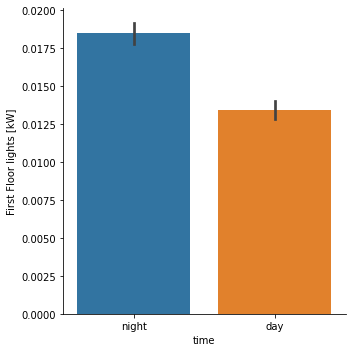

In [ ]:
#sns.countplot(x='time', data = logTrain, palette='hls')
#sns.barplot(x = newEnergydf["time"], hue = "Academy", data= newEnergydf)
#sns.catplot(x='time',
#            y='use [kW]',
#            data=newEnergydf,
#            kind='bar');

#ax = sns.barplot(x="day", y="total_bill", hue="sex", data=tips)
#graph = sns.barplot(class)

sns.catplot(x='time', y='First Floor lights [kW]', data=newEnergydf, kind='bar');

# display
#plt.show()

<h1> Finding Two: </h1>

Finding Two: From this comparison of usage of AC energy usage [kW] between the day and night, we can see that more energy [kW] is used on the night than the day. This finding was quite surprising. I honestly thought that it would be the opposite way around where AC energy usage would be higher during the day because the sun is out warming up the air. Some possible explanations of this finding are that people are generally more active outside during the day so they have no need to turn on the AC because they are not home, or they find that sleeping when the temperature is hot and causing them to sweat is more difficult than simply chilling in the house generally resulting in them turning the AC on for the night but dealing with the heat during the day.

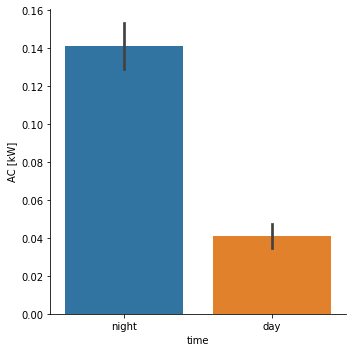

In [ ]:
#Home Office (R) [kW]
sns.catplot(x='time', y='AC [kW]', data=newEnergydf, kind='bar');

<h1> 6. </h1>
6. Visual Appeal and Layout - For all the tasks above, please include an explanation wherever asked and make sure that your procedure is documented (suitable comments) as good as you can.

Don’t forget to label all plots and include legends wherever necessary as this is key to making good visualizations! Ensure that the plots are visible enough by playing with size parameters. Be sure to use appropriate color schemes wherever possible to maximize the ease of understandability.

Everything must be laid out in a python notebook (.ipynb). (5 Point)